## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [22]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '../data/home-credit-default-risk/'

In [23]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/home-credit-default-risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df[df.Row == 'TARGET'].Description.values

array(['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'],
      dtype=object)

In [15]:
# 得知 TARGET 平均百分比
app_train.TARGET.mean()*100

8.072881945686495

In [16]:
# 找出在不同欄位中，TARGET 相對顯著的欄位
for col in app_train.select_dtypes('object', 'category'):
    print(app_train.groupby(col).TARGET.mean()*100)
    
# CODE_GENDER
# NAME_INCOME_TYPE
# NAME_EDUCATION_TYPE

NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64
CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64
FLAG_OWN_CAR
N    8.500227
Y    7.243730
Name: TARGET, dtype: float64
FLAG_OWN_REALTY
N    8.324929
Y    7.961577
Name: TARGET, dtype: float64
NAME_TYPE_SUITE
Children           7.376798
Family             7.494583
Group of people    8.487085
Other_A            8.775982
Other_B            9.830508
Spouse, partner    7.871592
Unaccompanied      8.183047
Name: TARGET, dtype: float64
NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484257
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64
NAME_EDUCATION_TYPE
Academic degree                   1.829268
Higher education                  5.355

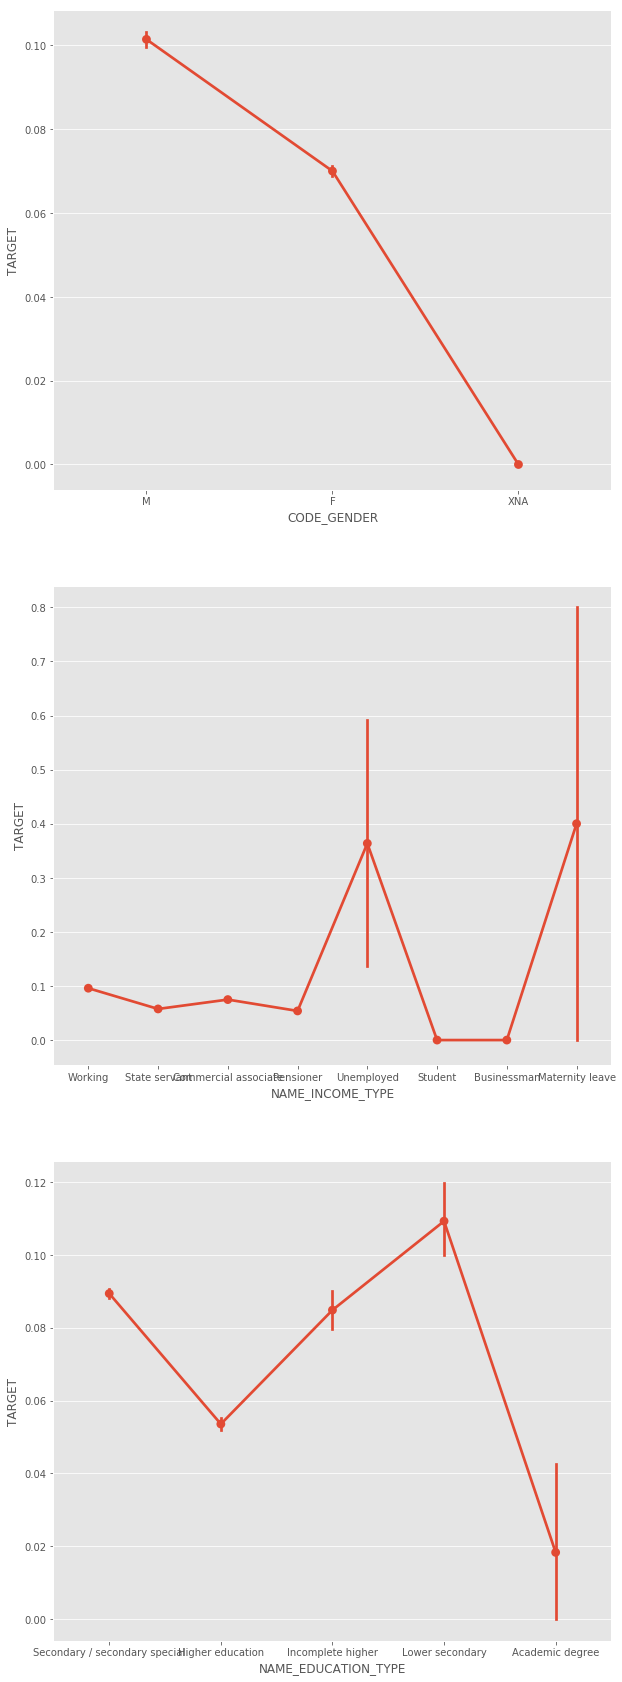

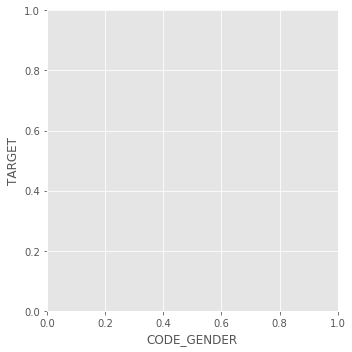

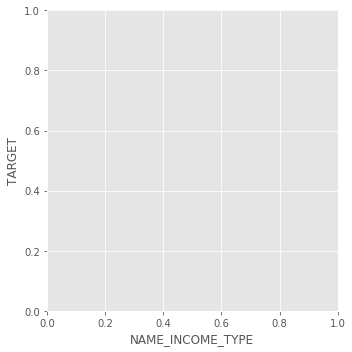

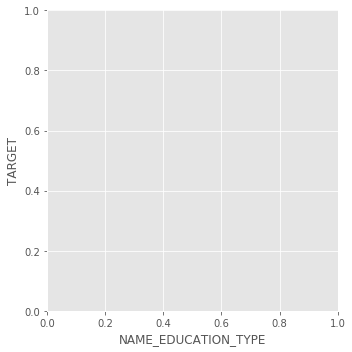

In [26]:
fig = plt.figure(figsize=(10,30))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
x=sns.factorplot(x="CODE_GENDER", y="TARGET", data=app_train, ax=ax1)
y=sns.factorplot(x="NAME_INCOME_TYPE", y="TARGET", data=app_train, ax=ax2)
z=sns.factorplot(x="NAME_EDUCATION_TYPE", y="TARGET", data=app_train, ax=ax3);

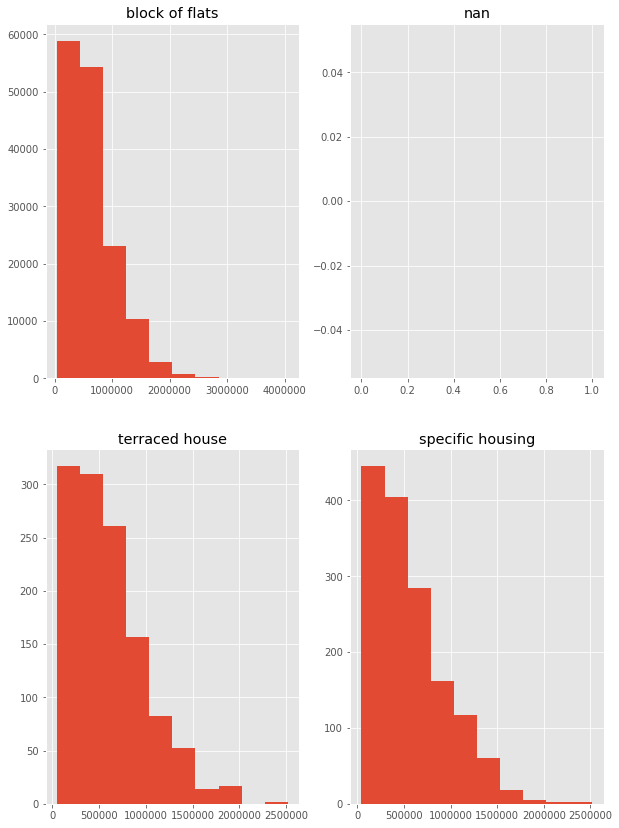

In [17]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
unique_house_type = app_train.HOUSETYPE_MODE.unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    # 子畫布
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    app_train.loc[app_train.HOUSETYPE_MODE == unique_house_type[i], 'AMT_CREDIT'].hist()
    
    plt.title(str(unique_house_type[i]))
plt.show()    